In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('C:/Users/HARSHA/Downloads/Fatigue Dataset.xlsx')

In [3]:
data.head(10).append(data.tail(10))

,Unit Cell,Porosity,Load,Life Range
0,FCC,30,70,7
1,FCC,30,75,7
2,FCC,30,80,7
3,FCC,30,85,6
4,FCC,30,90,6
5,FCC,30,95,6
6,FCC,30,100,6
7,FCC,30,105,5
8,FCC,30,110,5
9,FCC,30,115,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unit Cell   561 non-null    object
 1   Porosity    561 non-null    int64 
 2   Load        561 non-null    int64 
 3   Life Range  561 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.7+ KB


In [5]:
data.describe()

,Porosity,Load,Life Range
count,561.000000,561.000000,561.000000
mean,50.484848,113.333333,4.737968
std,12.718106,44.261130,1.629242
min,30.000000,30.000000,1.000000
25%,39.000000,80.000000,4.000000
50%,51.000000,110.000000,5.000000
75%,62.000000,145.000000,6.000000
max,70.000000,200.000000,7.000000


In [6]:
missing_values_count = data.isnull().sum()
missing_values_count

Unit Cell     0
Porosity      0
Load          0
Life Range    0
dtype: int64

<AxesSubplot:xlabel='Unit Cell', ylabel='Life Range'>

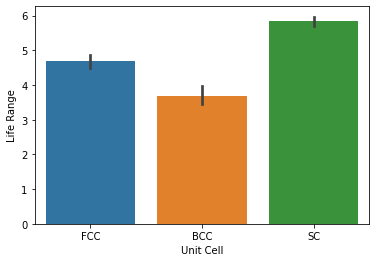

In [7]:
sns.barplot(x="Unit Cell",y="Life Range",data=data)

In [8]:
#x = data.drop('Life Range', axis = 1)
x=data.iloc[:,:-1]
x

,Unit Cell,Porosity,Load
0,FCC,30,70
1,FCC,30,75
2,FCC,30,80
3,FCC,30,85
4,FCC,30,90
...,...,...,...
556,SC,70,180
557,SC,70,185
558,SC,70,190
559,SC,70,195


In [9]:
#y = data['Life Range']
y=data.iloc[:,-1:]
y

,Life Range
0,7
1,7
2,7
3,6
4,6
...,...
556,4
557,4
558,4
559,4


In [10]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data.iloc[:, o] = le.fit_transform(data.iloc[:, o])
x = pd.get_dummies(x, columns=['Unit Cell'])
x

,Porosity,Load,Unit Cell_BCC,Unit Cell_FCC,Unit Cell_SC
0,30,70,0,1,0
1,30,75,0,1,0
2,30,80,0,1,0
3,30,85,0,1,0
4,30,90,0,1,0
...,...,...,...,...,...
556,70,180,0,0,1
557,70,185,0,0,1
558,70,190,0,0,1
559,70,195,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x, train_y)

C:\Users\HARSHA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HARSHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
predictions = model.predict(test_x)

In [14]:
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%")

accuracy =  33.72781065088758 %
